In [ ]:
from MSAs_Profiles_Fastas_Functions import *
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

/home/nicola/internship/winghel/msa_sequences_script/retrive_sequcnce.py:370: DtypeWarning: Columns (2,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  eukarya_metadata = pd.read_csv('/home/nicola/internship/winghel/msa_sequences_script/eukarya_proteomes_metadata.tsv', sep='\t', usecols=[0,1,2,8,9,10])


In [ ]:
#   Itiretavely search profiles of WHD made by random sampling the sequences to see the 
#   avarage score a sertain protein has if searched by the rest of the protein in the alignment.
#   The scope was to double check some sequences for which AlfaFold faild to fold a WHD

##### Not predicted WHD by AF

In [ ]:
#   Here I am actually iteratevly sampling sequences, making msa, building hmm out of it, searching it against the sequences in the alignmet and than storing the scores

In [18]:
no_WHD_prot={'ask1': ['COEREV004001', 'DIALUT000917', 'PALBIL007647', 'PLABRA003073'], 
 'dam1': ['BIGNAT010037', 'GALSUL003538', 'GONPAC051218', 'RIGRAM016075'], 
 'ska2': ['CHOSPE041422'],
 'ska3': ['DIPROT040626','EUGLON011654', 'GEFOKE024180', 'LENLIM009702', 'LEUCOM016550', 'MANSPH005803', 'MONEXI012361', 'RHIIRR025659', 'TELSPE030098', 'TRIADH009951'],
 'spc19': ['COLSPE004231', 'MANSPH002854', 'RAMBRE007886'],
 'spc34': ['AURLIM007031', 'COEREV001366', 'GONPAC028305', 'GUITHE009619'],
}

In [ ]:

for protein in no_WHD_prot.keys():

    print('Protein is : ' , protein)
    path_to_sequences=f'./alignments/{protein}_curated_WHD_not_aligned.fasta'
    subprocess.run(['cp', path_to_sequences, './AF_fails_on_WHD/'])

    # Target fasta copied
    path_to_sequences=f'./AF_fails_on_WHD/{protein}_curated_WHD_not_aligned.fasta'

    # Filter out sequences that are not predicted WHD
    path_to_filtered_sequences=f'./AF_fails_on_WHD/{protein}_curated_WHD_not_aligned_filtered.fasta'
    filter_fasta(path_to_sequences, no_WHD_prot[protein], path_to_filtered_sequences)
    
    for i in range((len(list(SeqIO.parse(path_to_filtered_sequences, format='fasta')))*30)):

        # Step 1: Select 5 random sequences from filtered and create a temp FASTA
        selected_fasta = select_random_sequences(path_to_filtered_sequences)
        print('     Step 1 done')

        # Step 2: Create MSA from selected sequences
        msa_fasta = create_msa(selected_fasta)
        print('     Step 2 done')

        # Step 3: Build HMM profile from MSA
        hmm_profile = build_hmm(msa_fasta)
        print('     Step 3 done')

        # Step 4: Run hmmsearch against target dataset
        hmm_search_results = run_hmmsearch(hmm_profile, path_to_sequences)
        print('     Step 4 done')
        
        # Step 5: Add scores to CSV
        csv_file_path = f"./AF_fails_on_WHD/hmm_search_result_{protein}.csv"
        hmm_hits_df = get_hmm_search_hits(hmm_search_results)
        integrate_hmm_scores_to_csv(csv_file_path, hmm_hits_df) 

        csv_query_file_path = f"./AF_fails_on_WHD/hmm_search_query_{protein}.csv"
        save_hmm_queries_to_csv(csv_query_file_path, msa_fasta)
        print('     Step 5 done, search results added')

        # Cleanup temporary files
        os.remove("temp_selected.fasta")
        os.remove("temp_msa.fasta")
        os.remove("temp_profile.hmm")
        os.remove("temp_hmmsearch_results.txt")
    os.remove(f'./AF_fails_on_WHD/{protein}_curated_WHD_not_aligned.fasta')
    os.remove(f'./AF_fails_on_WHD/{protein}_curated_WHD_not_aligned_filtered.fasta')  

##### Search Performances Banchmark

In [ ]:
# Avarage ability for a hmm of different sizes from WHD sequences to recover (hit) other WHD

In [57]:
# Dam1 performance test
hmm_search_dam1=pd.read_csv('/home/nicola/internship/winghel/random_search_banchmark/hmm_search_performance_dam1.csv',sep='\t')
precision=hmm_search_dam1['Precision'].mean()
p_sd=hmm_search_dam1['Precision'].std()
recall=hmm_search_dam1['Recall'].mean()
r_sd=hmm_search_dam1['Recall'].std()
print(f' Precision: {precision} +- {p_sd}')
print(f' Recall: {recall} +- {r_sd}')

 Precision: 0.9259242565347363 +- 0.025019930890520688
 Recall: 0.9420370370370368 +- 0.032214378175326415


In [58]:
# Ask1 performance test
hmm_search_5=pd.read_csv('/home/nicola/internship/winghel/random_search_banchmark/hmm_search_performance_5_ask1.csv',sep='\t')
hmm_search_4=pd.read_csv('/home/nicola/internship/winghel/random_search_banchmark/hmm_search_performance_4_ask1.csv',sep='\t')
hmm_search_3=pd.read_csv('/home/nicola/internship/winghel/random_search_banchmark/hmm_search_performance_3_ask1.csv',sep='\t')

precision_stats = pd.DataFrame(
    {
        'Mean':[hmm_search_5['Precision'].mean(),hmm_search_4['Precision'].mean(), hmm_search_3['Precision'].mean()],
        'Standard Deviation':[hmm_search_5['Precision'].std(), hmm_search_4['Precision'].std(), hmm_search_3['Precision'].std()],
    }
)

recall_stats = pd.DataFrame(
    {
        'Mean':[hmm_search_5['Recall'].mean(), hmm_search_4['Recall'].mean(), hmm_search_3['Recall'].mean()],
        'Standard Deviation':[hmm_search_5['Recall'].std(), hmm_search_4['Recall'].std(), hmm_search_3['Recall'].std()],
    }
)

row_names = ['5 Seq','4 Seq', '3 Seq']
precision_stats.index = row_names
recall_stats.index = row_names
print('Precision statistics:')
display(precision_stats)
print('Recall statistics:')
display(recall_stats)

Precision statistics:


,Mean,Standard Deviation
5 Seq,0.910913,0.013920
4 Seq,0.915461,0.020730
3 Seq,0.925007,0.028836


Recall statistics:


,Mean,Standard Deviation
5 Seq,0.949460,0.037230
4 Seq,0.925267,0.045305
3 Seq,0.880567,0.070771


##### Search Performances

In [ ]:
# Plot results for different random MSA searches for different proteins to see results

In [6]:
protein='ska3'
search=10

In [7]:
# Load roandom search results
if search==5:
    path=f'/home/nicola/internship/winghel/iterative_searches_results/AF_fails_on_WHD/5_seq/hmm_search_result_{protein}.csv'
elif search==10:
    path=f'/home/nicola/internship/winghel/iterative_searches_results/AF_fails_on_WHD/10_seq/hmm_search_result_{protein}.csv'
else:
    path=f'/home/nicola/internship/winghel/iterative_searches_results/random_search_banchmark/hmm_search_result_{protein}_notquery.csv'
hits_dataframe = pd.read_csv(path, sep=',')
# hits_dataframe.fillna(0, inplace=True)
hits_dataframe.replace(0.0, np.nan, inplace=True)
hits_mean=hits_dataframe.mean()
hits_sd=hits_dataframe.std()
hits_stats=pd.concat([hits_mean, hits_sd], axis=1)
hits_stats.columns=['Mean', 'Standard Deviation']
hits_stats=hits_stats.sort_index()
hits_stats

,Mean,Standard Deviation
ACACAS002411,60.943529,15.404274
ACAPLA003001,49.929902,18.821271
ANDGOD005558,63.772255,21.098537
ARATHA034994,53.704412,21.396266
BAFFRI057471,84.159314,15.681889
CHABRA027380,66.164902,21.495979
CHASUB002158,60.527451,15.515438
CHLATM007871,72.871961,14.919866
CHLREI009192,47.847300,26.822167
COLSPE008086,54.614804,20.598427


In [9]:
# Load True Positives
if search==5:
    positive_fasta = f"/home/nicola/internship/winghel/iterative_searches_results/AF_fails_on_WHD/5_seq/{protein}_curated_WHD_not_aligned_filtered.fasta"
elif search==10:
    positive_fasta = f"/home/nicola/internship/winghel/iterative_searches_results/AF_fails_on_WHD/10_seq/{protein}_curated_WHD_not_aligned_filtered.fasta"
else:
    positive_fasta = f"/home/nicola/internship/winghel/alignments/{protein}_curated_WHD_not_aligned.fasta"
positive_id = get_sequence_ids(positive_fasta)
positive_id = [hit[:12] for hit in positive_id]

In [10]:
# WHD
positive_hits_mean=hits_mean.loc[hits_mean.index.isin(positive_id)]
negative_hits_mean=hits_mean.loc[~hits_mean.index.isin(positive_id)]
hits_stats['WHD']=hits_stats.index.isin(positive_id)
hits_stats

,Mean,Standard Deviation,WHD
ACACAS002411,60.943529,15.404274,True
ACAPLA003001,49.929902,18.821271,True
ANDGOD005558,63.772255,21.098537,True
ARATHA034994,53.704412,21.396266,True
BAFFRI057471,84.159314,15.681889,True
CHABRA027380,66.164902,21.495979,True
CHASUB002158,60.527451,15.515438,True
CHLATM007871,72.871961,14.919866,True
CHLREI009192,47.847300,26.822167,True
COLSPE008086,54.614804,20.598427,True


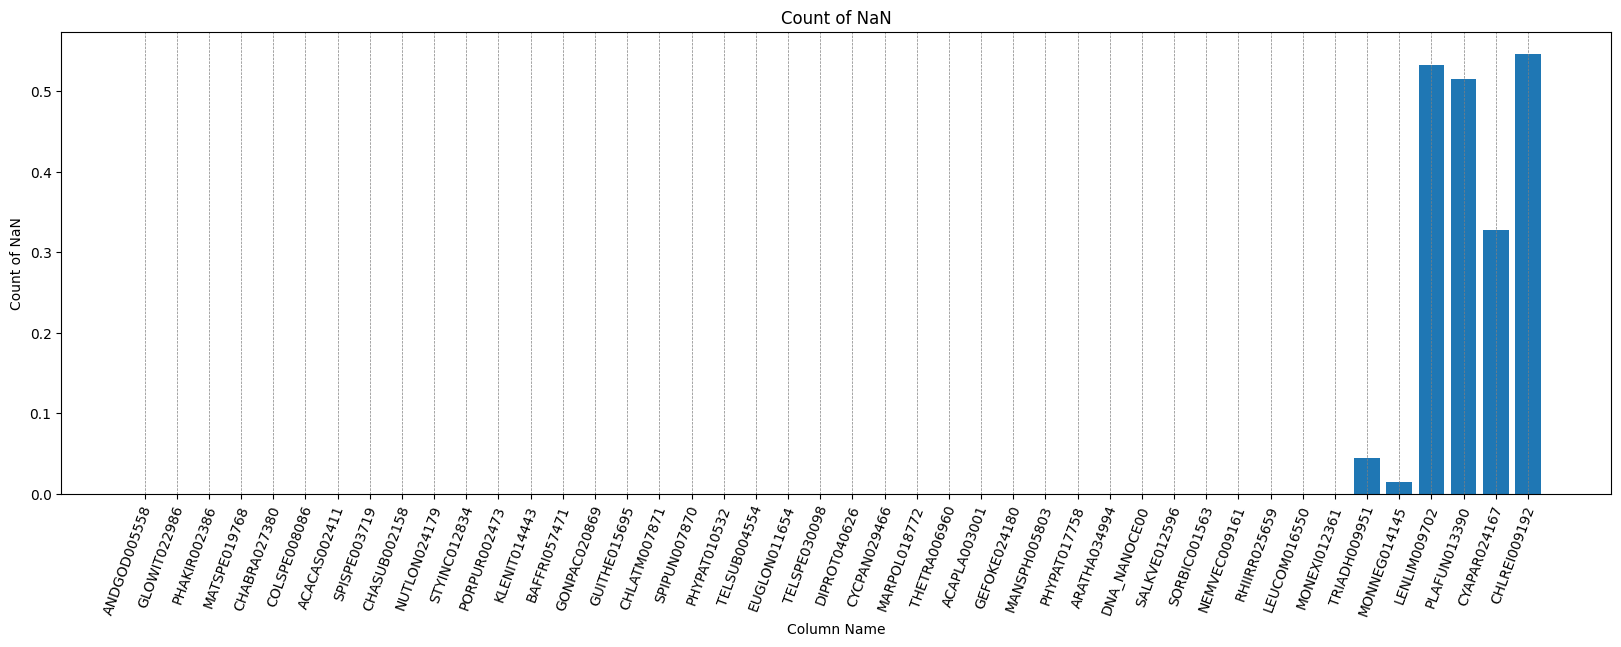

In [12]:
# Counts of NaN
nan_counts = hits_dataframe.isna().sum()
zero_counts=nan_counts/len(hits_dataframe)

plt.figure(figsize=(20, 6))
# Plot histogram
plt.bar(zero_counts.index, zero_counts.values)

plt.xlabel('Column Name')
plt.ylabel('Count of NaN')
plt.title('Count of NaN')
plt.xticks(rotation=70, ha='right')
# Get the current axes
ax = plt.gca()

# Shift the x-axis labels slightly
offset = transforms.ScaledTranslation(7/72, 0, plt.gcf().dpi_scale_trans)
# Note: 5/72 inches per point, adjust the 5 value as needed for your desired shift

# Apply the offset to each tick label
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)


# Show plot
plt.show()

In [13]:
min_scor=20

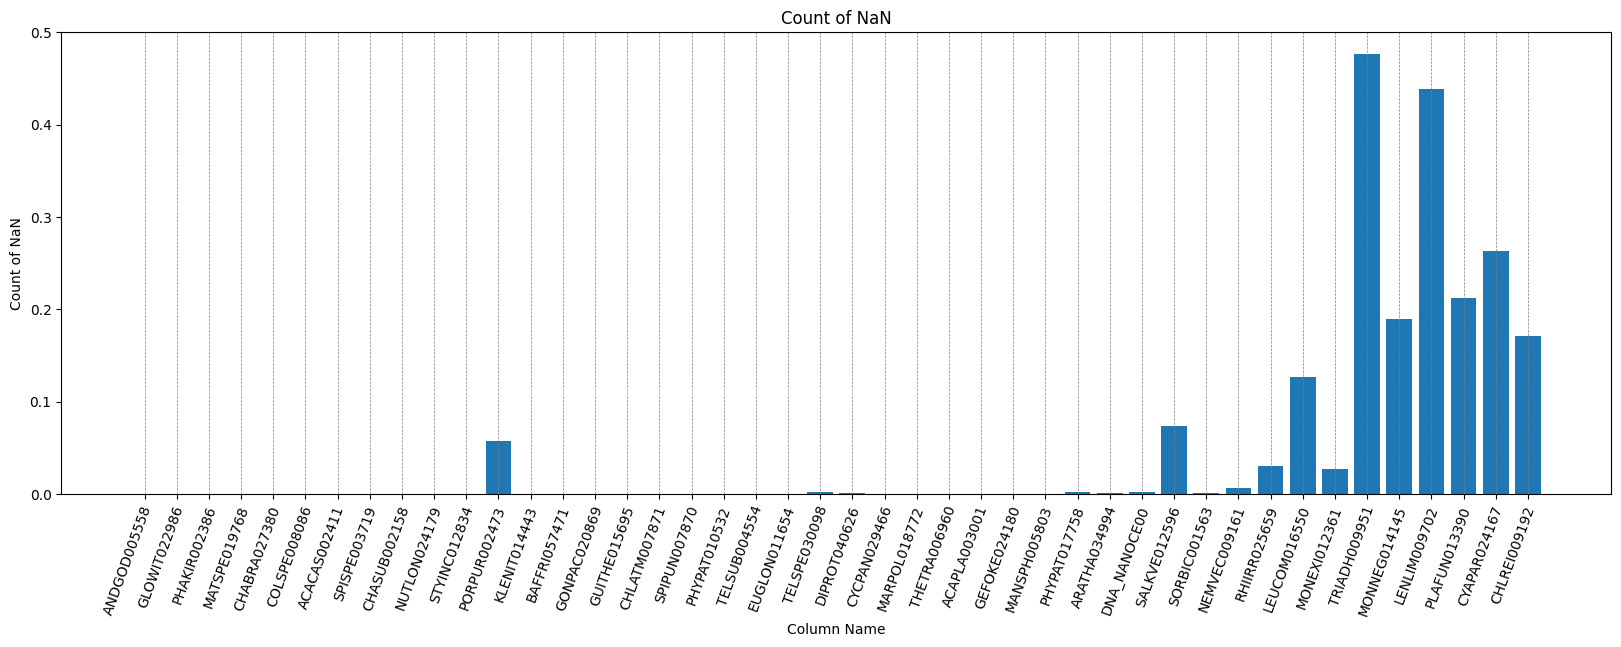

In [ ]:
# Counts of low scores
zero_counts = (hits_dataframe <= min_scor).sum()
zero_counts=zero_counts/len(hits_dataframe)

plt.figure(figsize=(20, 6))
# Plot histogram
plt.bar(zero_counts.index, zero_counts.values)

plt.xlabel('Column Name')
plt.ylabel('Count of NaN')
plt.title('Count of NaN')
plt.xticks(rotation=70, ha='right')
# Get the current axes
ax = plt.gca()

# Shift the x-axis labels slightly
offset = transforms.ScaledTranslation(7/72, 0, plt.gcf().dpi_scale_trans)
# Note: 5/72 inches per point, adjust the 5 value as needed for your desired shift

# Apply the offset to each tick label
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)


# Show plot
plt.show()

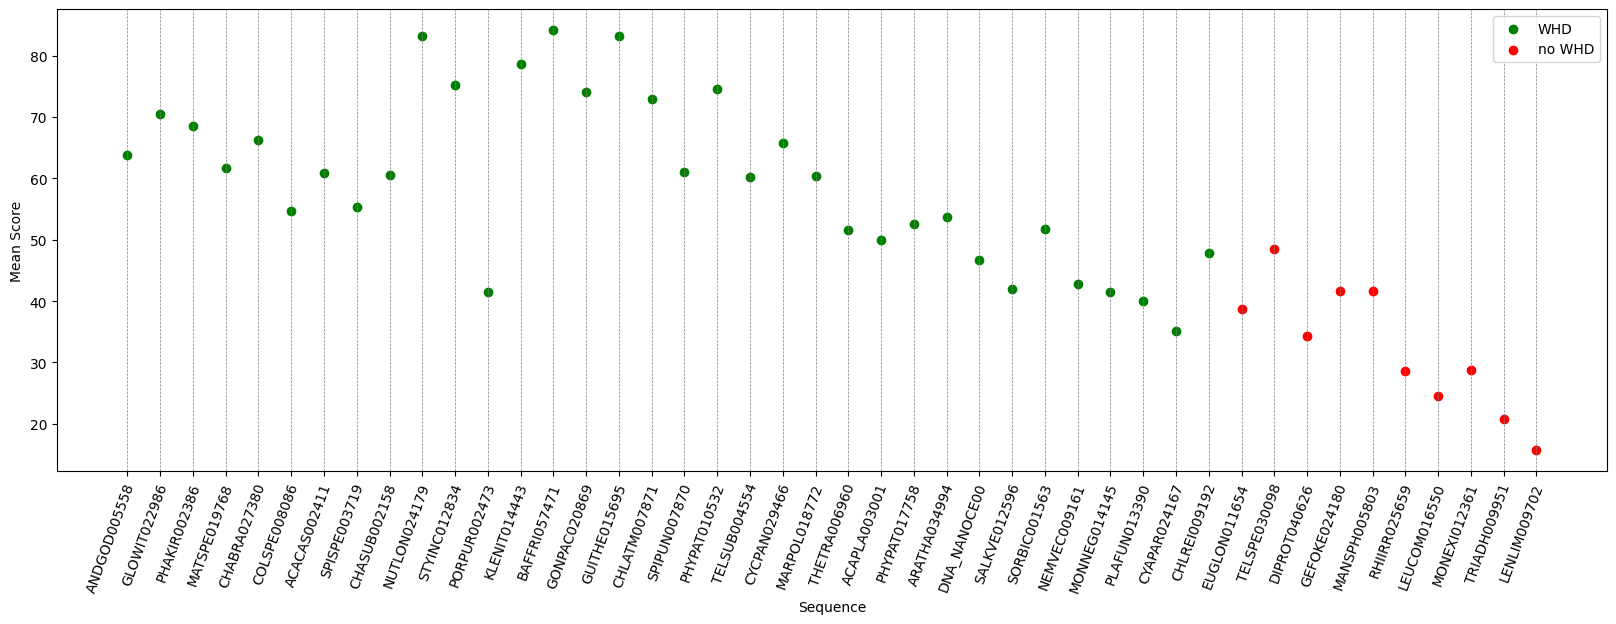

In [14]:
# Scatter Plot

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

plt.figure(figsize=(20, 6))

# Plot using boolean indexing
plt.scatter(positive_hits_mean.index, positive_hits_mean, color='green', label='WHD')
plt.scatter(negative_hits_mean.index, negative_hits_mean, color='red', label='no WHD')

# Adding labels and title for clarity
plt.title('')
plt.xlabel('Sequence')
plt.ylabel('Mean Score')

plt.xticks(rotation=70, ha='right')
# Get the current axes
ax = plt.gca()

# Shift the x-axis labels slightly
offset = transforms.ScaledTranslation(7/72, 0, plt.gcf().dpi_scale_trans)
# Note: 5/72 inches per point, adjust the 5 value as needed for your desired shift

# Apply the offset to each tick label
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
# Adding a legend to clarify colors
plt.legend()

# Show plot
plt.show()

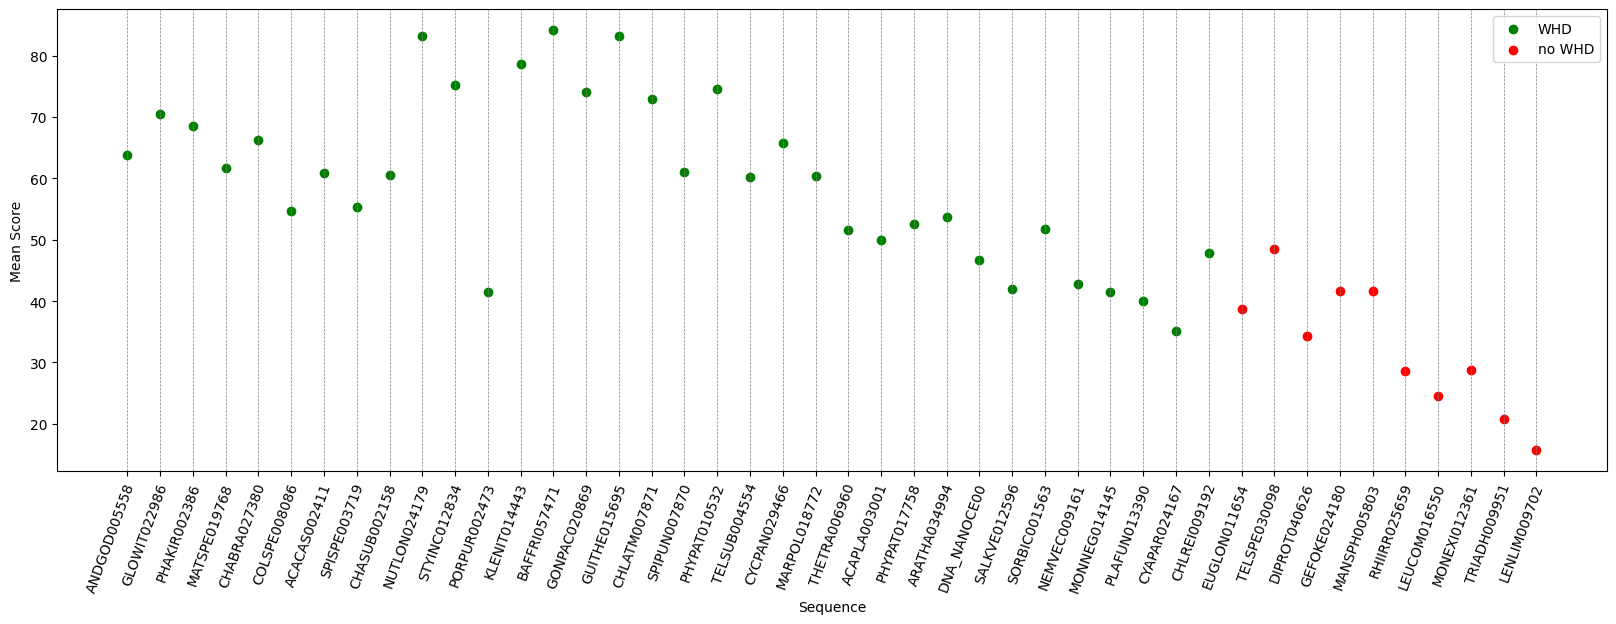

In [15]:
# Scatter Plot

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

plt.figure(figsize=(20, 6))

# Plot using boolean indexing
plt.scatter(positive_hits_mean.index, positive_hits_mean, color='green', label='WHD')
plt.scatter(negative_hits_mean.index, negative_hits_mean, color='red', label='no WHD')

# Adding labels and title for clarity
plt.title('')
plt.xlabel('Sequence')
plt.ylabel('Mean Score')

plt.xticks(rotation=70, ha='right')
# Get the current axes
ax = plt.gca()

# Shift the x-axis labels slightly
offset = transforms.ScaledTranslation(7/72, 0, plt.gcf().dpi_scale_trans)
# Note: 5/72 inches per point, adjust the 5 value as needed for your desired shift

# Apply the offset to each tick label
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
# Adding a legend to clarify colors
plt.legend()

# Show plot
plt.show()

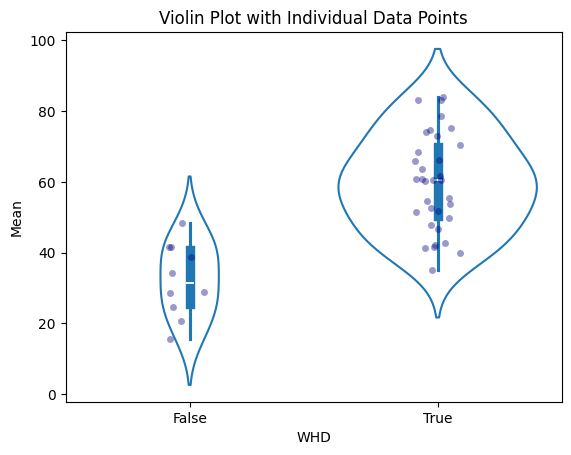

In [16]:
# Violin Plot

import seaborn as sns

# Create a violin plot

# Create a violin plot with the area proportional to the number of samples
sns.violinplot(x='WHD', y='Mean', data=hits_stats,  density_norm="count", fill=False)

# Add the individual data points using stripplot
sns.stripplot(x='WHD', y='Mean', data=hits_stats, color='navy', alpha=0.4, jitter=True)

# Adding labels and title for clarity
plt.title('Violin Plot with Individual Data Points')
plt.xlabel('WHD')
plt.ylabel('Mean')

# Show plot with gridlines
# plt.grid(True)
plt.show()


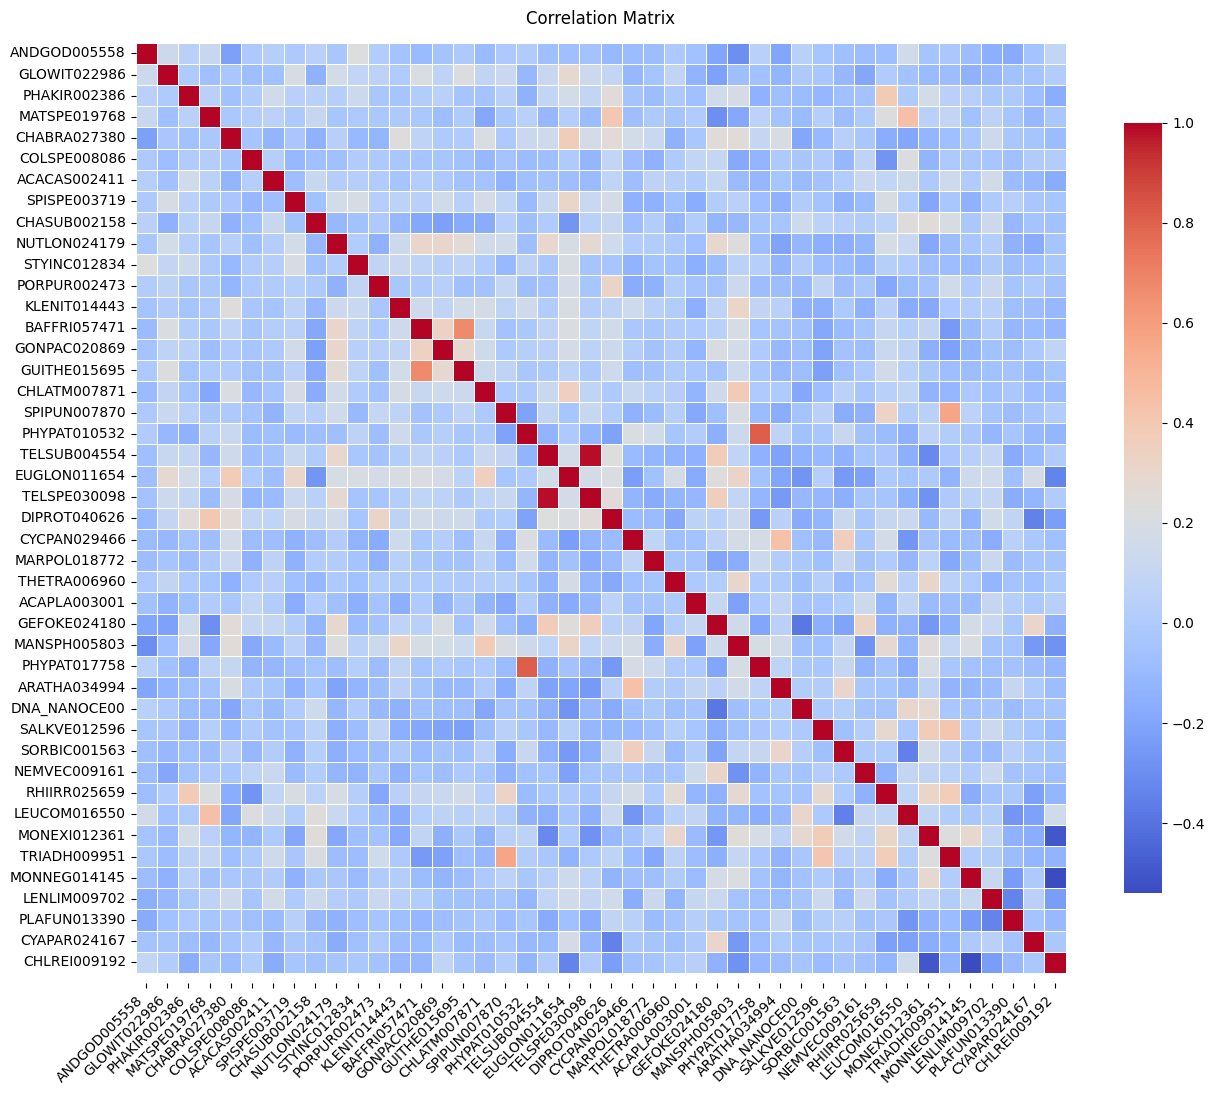

In [17]:
# Calculate the correlation matrix
corr = hits_dataframe.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=True, yticklabels=True)

# Ensure all tick labels are shown
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Adding title for clarity
plt.title('Correlation Matrix')

# Fix for matplotlib bug that cuts off top/bottom of seaborn viz
plt.ylim(len(corr)+0.5, -0.5)

# Show plot
plt.show()